In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# Load both datasets
file_path1 = "/content/drive/MyDrive/PRODIGY_DS_03/bank/bank-full.csv"
file_path2 = "/content/drive/MyDrive/PRODIGY_DS_03/bank-additional/bank-additional/bank-additional.csv"

# Read the datasets
df1 = pd.read_csv(file_path1, sep=";")
df2 = pd.read_csv(file_path2, sep=";")

# Display the first few rows of both datasets
print("First dataset:")
print(df1.head())

print("\nSecond dataset:")
print(df2.head())


First dataset:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Second dataset:
   age          job  marital          education default  housing     loan  \
0 

In [49]:
df.columns

Index(['agejobmaritaleducationdefaulthousingloancontactmonthday_of_weekdurationcampaignpdayspreviouspoutcomeemp.var.ratecons.price.idxcons.conf.idxeuribor3mnr.employedy'], dtype='object')

In [41]:
# Remove quotes from column names
df1.columns = df1.columns.str.replace('"', '')
df2.columns = df2.columns.str.replace('"', '')



In [42]:

# Check for missing values
print(df1.isnull().sum())
print(df2.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [43]:
# Encode categorical variables
encoder = LabelEncoder()
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = encoder.fit_transform(df1[col])
for col in df2.select_dtypes(include=['object']).columns:
    df2[col] = encoder.fit_transform(df2[col])

In [44]:

# Define features (X) and target (y) for each dataset
X1 = df1.drop(columns=['y'])  # Features from first dataset
y1 = df1['y']                 # Target variable

X2 = df2.drop(columns=['y'])  # Features from second dataset
y2 = df2['y']                 # Target variable

In [45]:
# Split into training (80%) and testing (20%) sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)

print("First dataset training set shape:", X_train1.shape)
print("First dataset testing set shape:", X_test1.shape)
print("Second dataset training set shape:", X_train2.shape)
print("Second dataset testing set shape:", X_test2.shape)

First dataset training set shape: (36168, 16)
First dataset testing set shape: (9043, 16)
Second dataset training set shape: (3295, 20)
Second dataset testing set shape: (824, 20)


In [46]:
# Train a Decision Tree model on both datasets
model1 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
model1.fit(X_train1, y_train1)

model2 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
model2.fit(X_train2, y_train2)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [47]:
# Predictions
y_pred1 = model1.predict(X_test1)
y_pred2 = model2.predict(X_test2)

# Accuracy
accuracy1 = accuracy_score(y_test1, y_pred1)
accuracy2 = accuracy_score(y_test2, y_pred2)

print(f"First dataset - Model Accuracy: {accuracy1:.2f}")
print(f"Second dataset - Model Accuracy: {accuracy2:.2f}")



First dataset - Model Accuracy: 0.90
Second dataset - Model Accuracy: 0.90


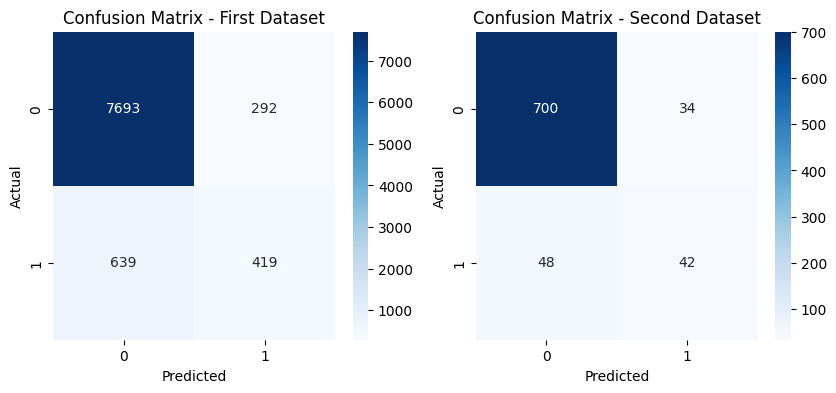

Classification Report - First Dataset:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      7985
           1       0.59      0.40      0.47      1058

    accuracy                           0.90      9043
   macro avg       0.76      0.68      0.71      9043
weighted avg       0.88      0.90      0.89      9043

Classification Report - Second Dataset:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       734
           1       0.55      0.47      0.51        90

    accuracy                           0.90       824
   macro avg       0.74      0.71      0.73       824
weighted avg       0.89      0.90      0.90       824



In [48]:
# Confusion Matrices
conf_matrix1 = confusion_matrix(y_test1, y_pred1)
conf_matrix2 = confusion_matrix(y_test2, y_pred2)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - First Dataset")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Second Dataset")

plt.show()

# Classification Report
print("Classification Report - First Dataset:\n", classification_report(y_test1, y_pred1))
print("Classification Report - Second Dataset:\n", classification_report(y_test2, y_pred2))


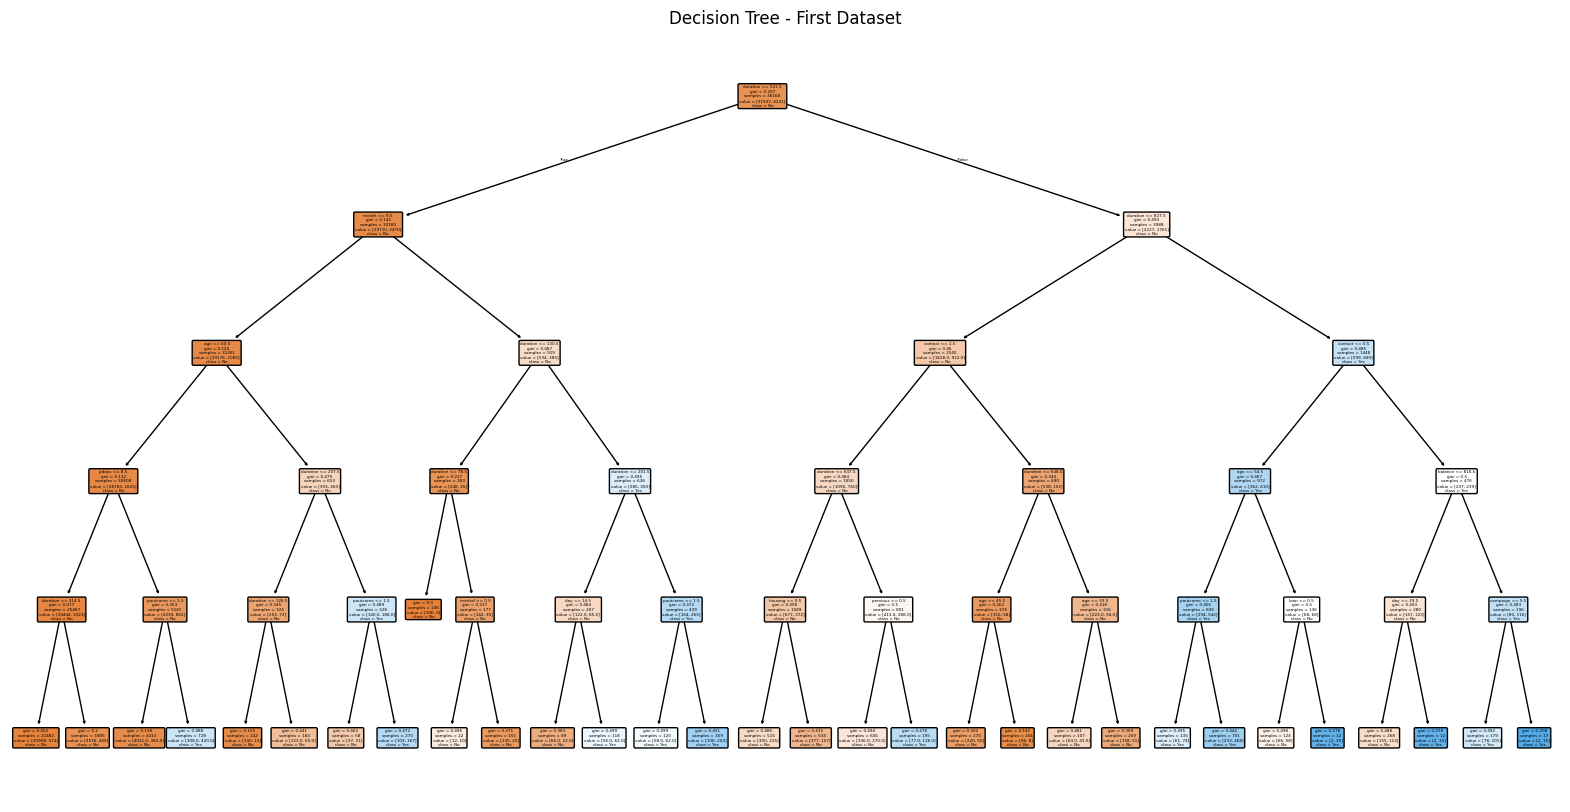

In [31]:
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(model1, feature_names=X1.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Decision Tree - First Dataset")
plt.show()



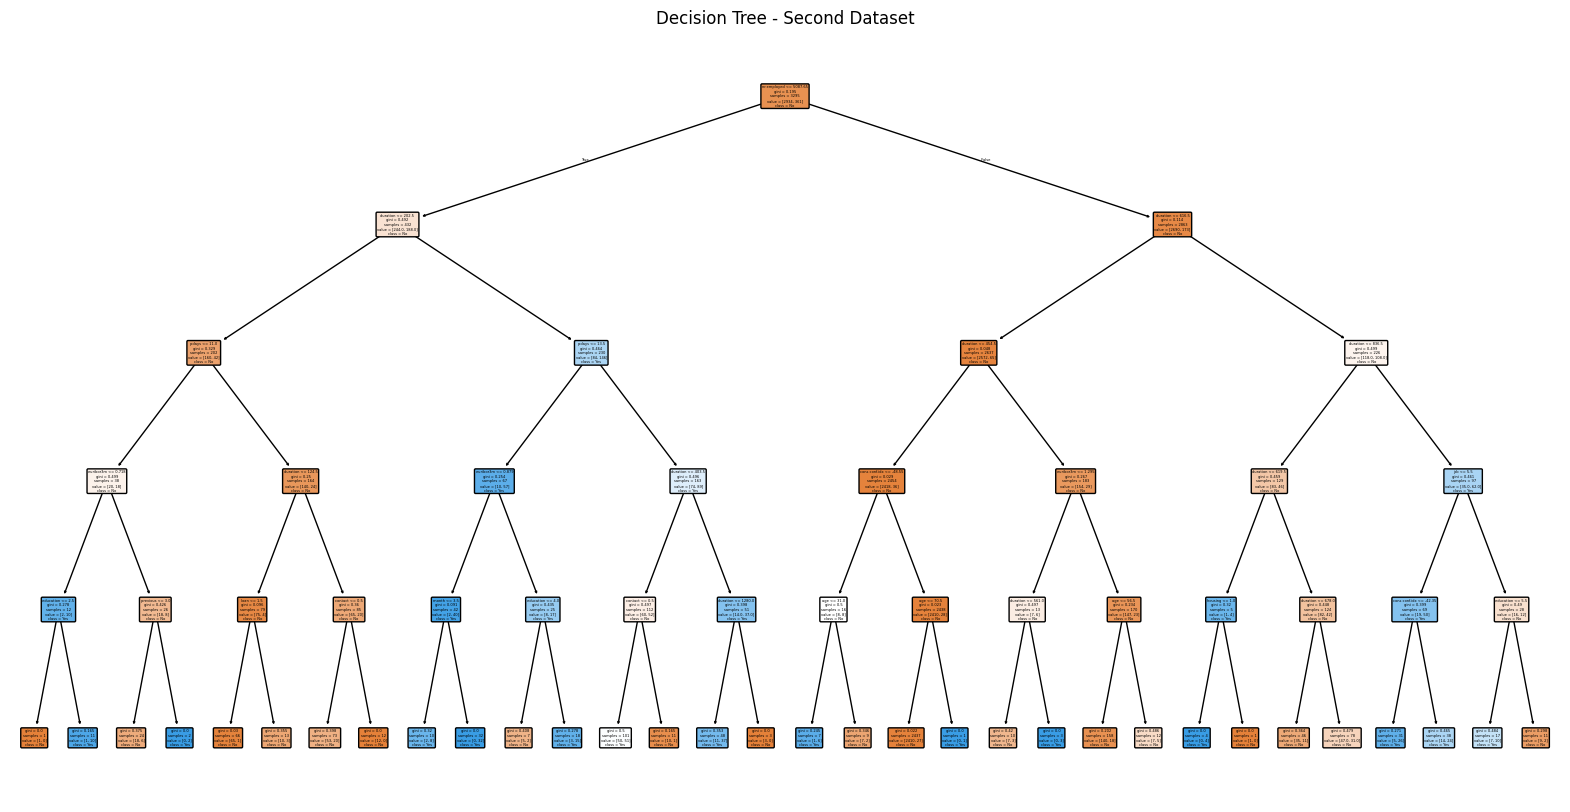

In [30]:

plt.figure(figsize=(20, 10))
tree.plot_tree(model2, feature_names=X2.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Decision Tree - Second Dataset")
plt.show()